# Bart Analysis

* analysis of the open bart dataset

In [64]:
import pandas as pd
import altair as alt

alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [ ]:
df = pd.concat(
    [
        pd.read_csv('http://64.111.127.166/origin-destination/date-hour-soo-dest-2017.csv.gz', header=None),
        pd.read_csv('http://64.111.127.166/origin-destination/date-hour-soo-dest-2018.csv.gz', header=None),
        pd.read_csv('http://64.111.127.166/origin-destination/date-hour-soo-dest-2019.csv.gz', header=None)
    ]
)

In [ ]:
df.shape

In [8]:
df.columns = ['date', 'hour', 'start', 'stop', 'riders']
df.head()

,date,hour,start,stop,riders
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


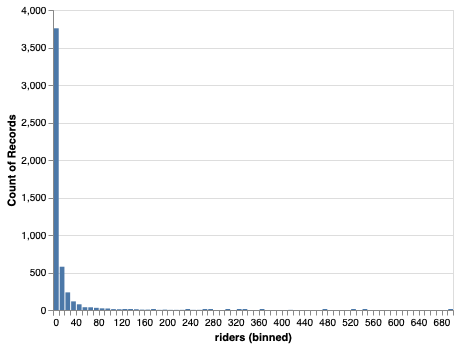

In [32]:
alt.Chart(
    df.sample(5000)
).mark_bar().encode(
    x=alt.X('riders', bin=alt.Bin(maxbins=100)),
    y='count()'
)

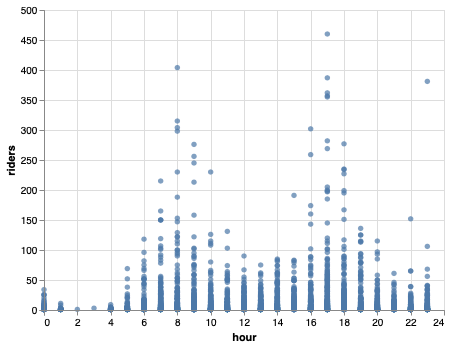

In [33]:
alt.Chart(
    df.sample(5000)
).mark_circle().encode(
    x='hour',
    y='riders'
)

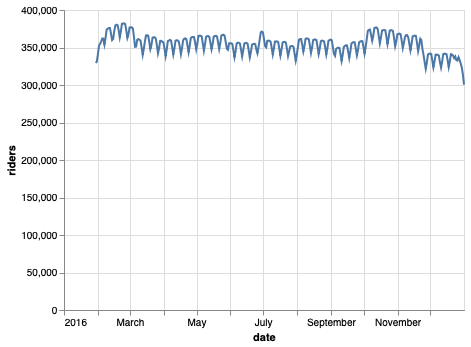

In [44]:
ser = pd.DataFrame(pd.Series(df.groupby('date').apply(lambda x: x.riders.sum())).rolling(window=30).mean()).reset_index()
ser.columns = [ 'date', 'riders']

alt.Chart(
    ser
).mark_line().encode(
    x='date:T',
    y='riders'
)

In [57]:
totaled = pd.DataFrame(df.groupby(['start', 'stop']).apply(lambda x: sum(x.riders))).reset_index()
totaled.columns = ['start', 'stop', 'rides']

In [59]:
totaled.head()

,start,stop,rides
0,12TH,12TH,13748
1,12TH,16TH,99432
2,12TH,19TH,19710
3,12TH,24TH,87045
4,12TH,ASHB,81563


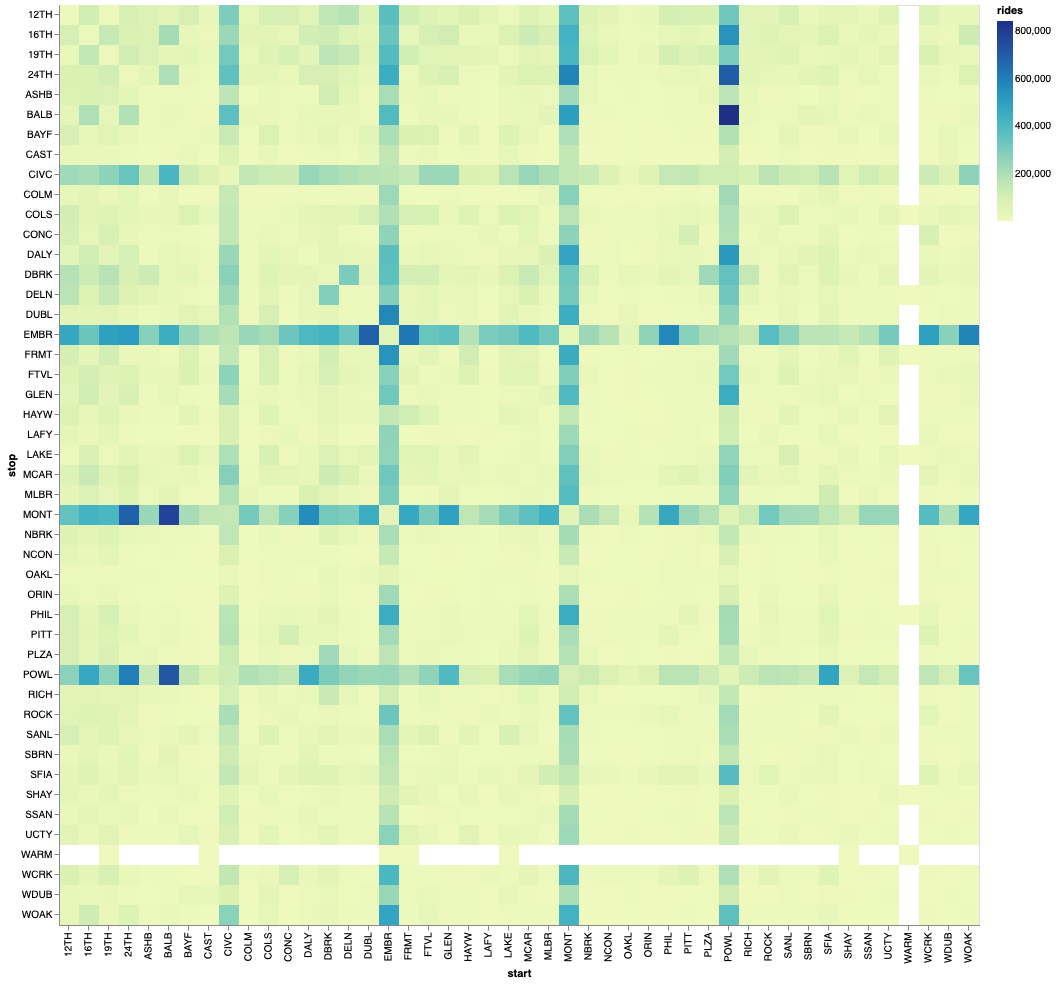

In [60]:
alt.Chart(totaled).mark_rect().encode(
    x='start:O',
    y='stop:O',
    color='rides'
)